In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

In [32]:
# test it on blob-shaped clusters
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300,
                  n_features=2,
                  centers=[[0,0],[0,5],[5,5]],
                  cluster_std=[1.0, 0.6, 1.0],
                  random_state=2,
                 )

dbscan = DBSCAN(eps=0.6, min_samples=5)
labels = dbscan.fit_predict(X)
#print(labels)

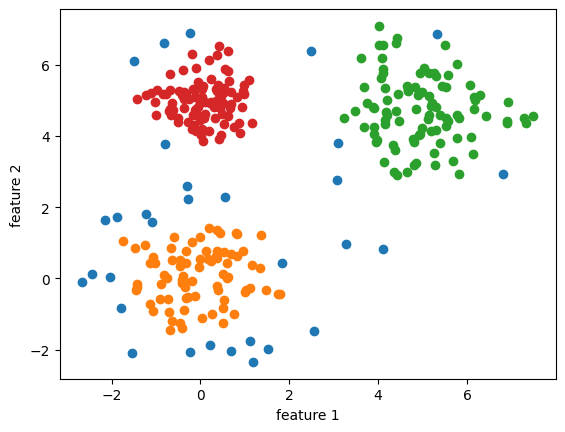

In [33]:
# visualize the results
cluster_count = max(labels) + 1
plt.xlabel("feature 1")
plt.ylabel("feature 2")

noise = np.array([X[i] for i in range(len(labels)) if labels[i] == -1])
plt.scatter(noise[:, 0], noise[:, 1])

for label in range(cluster_count):
    filtered_label = np.array([X[i] for i in range(len(labels)) if labels[i] == label])
    plt.scatter(filtered_label[:, 0], filtered_label[:, 1])



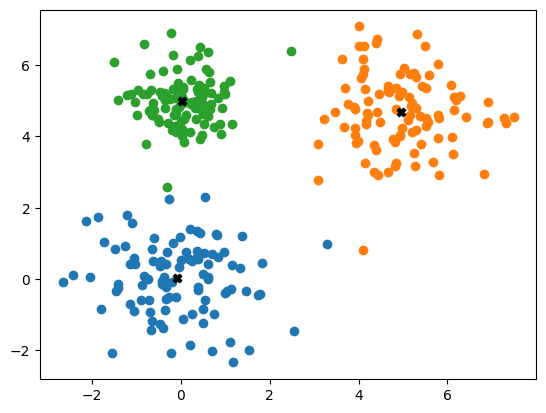

In [34]:
# now cluster the same dataset with kmeans setting p=3 (number of clusters)

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3,
               init='k-means++',
               random_state=0,
               n_init=10,
               )
kmeans.fit(X)

centers = kmeans.cluster_centers_
labels = kmeans.labels_

label_0 = np.array([X[i] for i in range(len(labels)) if labels[i] == 0])
label_1 = np.array([X[i] for i in range(len(labels)) if labels[i] == 1])
label_2 = np.array([X[i] for i in range(len(labels)) if labels[i] == 2])

plt.scatter(label_0[:, 0], label_0[:, 1])
plt.scatter(label_1[:, 0], label_1[:, 1])
plt.scatter(label_2[:, 0], label_2[:, 1])

# plot the cluster centers
centers_X = [point[0] for point in centers]
centers_Y = [point[1] for point in centers]
plt.scatter(centers_X, centers_Y, c='#000000', marker='X')

In [35]:
# now try it with non-trivial cluster shapes
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=300,
                  noise=0.05,
                  random_state=0,
                 )

[0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0
 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1
 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0
 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1 1
 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1
 1 0 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0 1
 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1
 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0
 0 1 1 0]


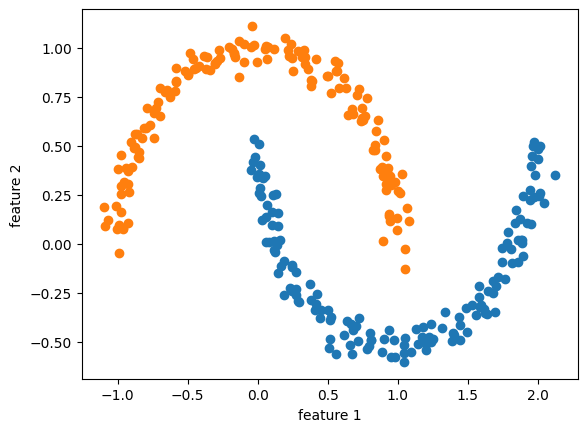

In [36]:
# DBSCAN first
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X)

print(labels)

# visualize the results
cluster_count = max(labels) + 1
plt.xlabel("feature 1")
plt.ylabel("feature 2")

noise = np.array([X[i] for i in range(len(labels)) if labels[i] == -1])
if noise.size > 0:
    plt.scatter(noise[:, 0], noise[:, 1])

for label in range(cluster_count):
    filtered_label = np.array([X[i] for i in range(len(labels)) if labels[i] == label])
    plt.scatter(filtered_label[:, 0], filtered_label[:, 1])

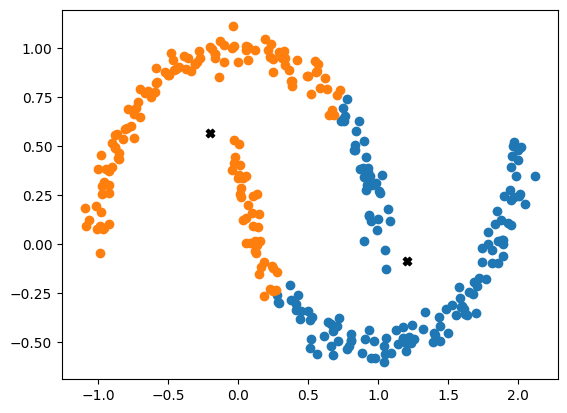

In [37]:
# now kmeans
kmeans = KMeans(n_clusters=2,
               init='k-means++',
               random_state=0,
               n_init=10,
               )
kmeans.fit(X)

centers = kmeans.cluster_centers_
labels = kmeans.labels_

label_0 = np.array([X[i] for i in range(len(labels)) if labels[i] == 0])
label_1 = np.array([X[i] for i in range(len(labels)) if labels[i] == 1])

plt.scatter(label_0[:, 0], label_0[:, 1])
plt.scatter(label_1[:, 0], label_1[:, 1])

# plot the cluster centers
centers_X = [point[0] for point in centers]
centers_Y = [point[1] for point in centers]
plt.scatter(centers_X, centers_Y, c='#000000', marker='X')

In [38]:
# see! completely different results!!!